In [15]:
import numpy as np
import pandas as pd
import xgboost as xgb
import gc
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

In [2]:
print('Loading data ...')
train = pd.read_csv('dataset.csv')

Loading data ...


In [3]:
print('Creating training set ...')
x_train = train.drop(['LABEL'], axis=1)
y_train = train['LABEL'].values
print(x_train.shape, y_train.shape)


train_columns = x_train.columns

split = 400        # 80% of train data
x_train, y_train, x_valid, y_valid = x_train[:split], y_train[:split], x_train[split:], y_train[split:]

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)


Creating training set ...
(500, 17) (500,)
(400, 17) (400,)
(100, 17) (100,)


In [4]:
print('Building DMatrix...')

d_train = xgb.DMatrix(x_train, label=y_train)    #construct DMatrix from numpy.arrays
d_valid = xgb.DMatrix(x_valid, label=y_valid)

# del x_train, x_valid; gc.collect()



Building DMatrix...


In [10]:
print('Training ...')

our_params = {}
our_params['eta'] = 0.1
our_params['objective'] ='rank:pairwise'         #'multi:softmax'/  rank:pairwise
# our_params['eval_metric'] = 'merror'  #mlogloss  / merror  / auc
our_params['max_depth'] = 4
our_params['silent'] = 1

cv_xgb = xgb.cv(params = our_params, dtrain = d_train, num_boost_round = 3000, nfold = 5,
                metrics = ['error'],early_stopping_rounds = 100) # Look for early stopping that minimizes error
# Make sure you enter metrics inside a list or you may encounter issues!



Training ...


In [12]:
# cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
434,-0.9575,0.144612,-0.996875,0.066790
435,-0.9575,0.107413,-0.993750,0.069231
436,-0.9575,0.107413,-0.996875,0.066790
437,-0.9700,0.127867,-0.996875,0.066790
438,-0.9825,0.135462,-0.996875,0.066790


In [20]:
our_params = {}
our_params['eta'] = 0.1
our_params['seed']=0
our_params['objective'] ='rank:pairwise'         #'multi:softmax'/  rank:pairwise
# our_params['eval_metric'] = 'merror'  #mlogloss  / merror  / auc
our_params['max_depth'] = 4
our_params['silent'] = 1
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
# clf = xgb.train(our_params, d_train, 438, watchlist, early_stopping_rounds=500, verbose_eval=10)
clf = xgb.train(our_params, d_train, 438)
# del d_train, d_valid

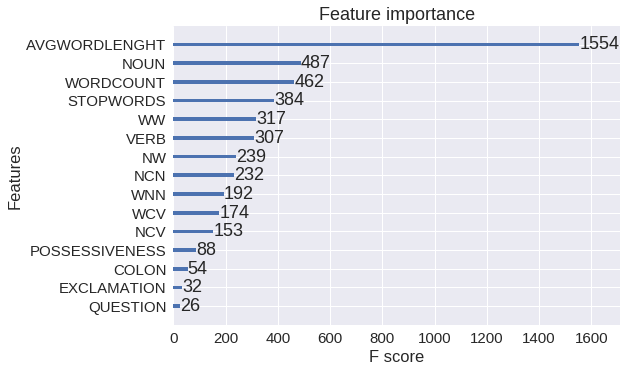

In [21]:
xgb.plot_importance(clf)

In [ ]:
print('Building test set ...')
